# Loterie

## Présentation de l'activité
- **Niveau de classe :**
 - Classe de première de la voie générale (spécialité mathématiques).
- **Références au programme :** 
 - Spécialité mathématiques de première générale : *Algorithme renvoyant l’espérance, la variance ou l‘écart type d’une variable aléatoire*.
 - Spécialité mathématiques de première générale : *Simuler une variable aléatoire avec Python*.
 - Spécialité mathématiques de première générale : *Lire, comprendre et écrire une fonction Python renvoyant la moyenne d’un échantillon de taille 𝑛 d’une variable aléatoire*.
 - Spécialité mathématiques de première générale : *Étudier sur des exemples la distance entre la moyenne d’un échantillon simulé de taille $n$ d’une variable aléatoire et l’espérance de cette variable aléatoire*.
 - Spécialité mathématiques de première générale : *Simuler, avec Python ou un tableur, $N$ échantillons de taille $n$ d’une variable aléatoire, d’espérance $\mu$ et d’écart type $\sigma$. Si $m$ désigne la moyenne d’un échantillon, calculer la proportion des cas où l’écart entre $m$ et $\mu$ est inférieur ou égal à 2$\frac{\sigma}{\sqrt{n}}$*.
- **Description :** activité abordant les notions de simulation et d'espérance de gain dans le contexte d'un jeu de loterie.

## Situation
 
À l'occasion d'un jeu de loterie, un joueur mise une certaine somme d'argent et fait tourner une première fois une roue circulaire découpée en $8$ secteurs de même angle numérotés de $1$ à $8$. Les quatre premiers secteurs sont rouges. S'il tombe sur le secteur $1$, il récupère le double de sa mise, sinon il relance la roue et gagne sa mise augmentée de $6$ euros s'il tombe sur un secteur de couleur rouge. Dans les autres cas, sa mise est perdue. On note $X$ la variable aléatoire donnant le gain en euros associé à ce jeu.


## Simulation du jeu
Nous allons maintenant simuler une partie.

La fonction `randint` de la bibliothèque `random` permet de générer aléatoirement des nombres entiers compris entre deux bornes données.

In [1]:
from random import randint

La fonction `jeu` simule une partie. Elle prend la valeur de la mise en paramètre et renvoie la valeur du gain (sans la mise de départ). Cette fonction est ensuite testée pour une mise égale à $10$ euros.

In [2]:
def jeu(mise):
    lancer1 = randint(1,8)
    if lancer1 == 1:
        gain = mise
    else:
        lancer2 = randint(1,8)
        if lancer2 <= 4:
            gain = 6
        else:
            gain = -mise
    return gain
print(jeu(10))

6


<div class="alert alert-info">

Suggestions pédagogiques
</div>

- **Expliquer un programme** 

    Expliquer les lignes 2, 7 et 10.
- **Compléter un programme**

     Le programme précédent étant fourni en remplaçant les lignes 7, 8 et 10 par `if ...`, `gain= ...` et `gain= ...`, demander aux élèves de compléter les lignes 7, 8 et 10. 

## Simulation de $n$ expériences
Dans cette section, l'expérience est répétée $n$ fois de manière à pouvoir calculer le gain moyen sur ces $n$ parties.

La fonction `gainMoyen` prend en paramètres la mise initiale et un nombre $n$ de parties. Elle renvoie le gain moyen (en euro) obtenu au cours de ces $n$ parties avec cette mise initiale.

In [3]:
def gainMoyen(mise, n):
    gainTotal = 0
    for i in range(n):
        gainTotal = gainTotal + jeu(mise)
    return gainTotal/n
print(gainMoyen(10, 100000))

-0.56488


<div class="alert alert-info">

Suggestions pédagogiques
</div>

- **Expliquer un programme** 
 - Expliquer la ligne 2.
 - Que fait la ligne 4 ? 
- **Compléter un programme**

 Le programme précédent étant fourni en remplaçant les lignes 4 et 5 par `gainTotal = ...` et `return ...`, demander aux élèves de compléter les lignes 4 et 5. .

## Convergence du gain moyen
Dans cette section, nous allons étudier le comportement asymptotique du gain moyen en fonction du nombre de parties.

Importation de la librairie graphique.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

La fonction `cumul` crée la liste des gains moyens obtenus pour des échantillons de taille variant entre $1$ et $n$.
On représente ensuite la valeur du gain moyen en fonction de la taille de l'échantillon afin de visualiser la convergence du gain moyen vers l'espérance du gain (loi des grands nombres).

In [5]:
def cumul(n):
    F = []
    gainTotal = 0
    for i in range(n): 
        gainTotal = gainTotal + jeu(mise)
        F.append(gainTotal/(i+1))
    return F

<div class="alert alert-info">

Suggestions pédagogiques
</div>

- **Expliquer un programme**

    Expliquer la ligne 6.
- **Compléter un programme**

 Le programme précédent étant fourni en remplaçant la ligne 6 par `F.append(...)`, demander aux élèves de compléter la ligne 6.

## Estimation de la mise rendant le jeu équitable

Le programme suivant représente le gain moyen en fonction du nombre de parties.

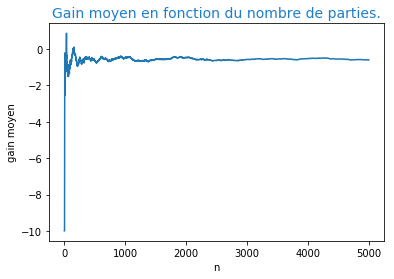

In [6]:
mise = 10
n = 5000 

F = cumul(n)

plt.title("Gain moyen en fonction du nombre de parties.",color="#1e7fcb",fontsize=14)
plt.xlabel('n')
plt.ylabel('gain moyen')
plt.plot(F)
plt.show()

<div class="alert alert-info">

Suggestions pédagogiques
</div>

- **Tester** le programme précédent avec différentes valeurs de mise. Quelle doit être la valeur approximative de la mise pour que le jeu soit équitable ?

<div class="alert alert-success">
<details>
    <summary>Réponse</summary>
    
    On trouve environ une mise égale à  8,4  euros.
    
</details>
</div>    

## Étude de la loi de probabilités de la variable aléatoire $X$

<div class="alert alert-info">

Suggestions pédagogiques
</div>

- **Mathématiques débranchées**

    À l'aide d'un arbre de probabilités, donner la loi de probabilités de $X$.

<div class="alert alert-success">
<details>
    <summary>Réponse</summary>
    
    P(X=mise)=1/8, P(X=6)=7/16, P(X=-mise)=7/16
    
</details>
</div>    

## Programme de calcul de l'espérance de $X$
La fonction `esperance` renvoie l'espérance d'une variable aléatoire dont la loi est donnée sous la forme de deux listes. Elle prend deux listes en paramètres : la liste des valeurs possibles pour $X$ et celle des probabilités associées.

In [7]:
def esperance(X,P):
    E = 0
    for i in range(len(X)):
        E = E + X[i]*P[i]
    return E
mise=10
X=[mise, 6, -mise]
P=[1/8, 7/16, 7/16]
print("L'espérance est égale à",esperance(X,P)) 

L'espérance est égale à -0.5


<div class="alert alert-info">

Suggestions pédagogiques
</div>

* **Compléter un programme**

    Le programme précédent étant fourni en remplaçant les lignes 7 et 8 par `X= ...` et `P= ...`, demander aux élèves de compléter les lignes 7 et 8 à l'aide de la loi de probabilité de $X$.

* **Écrire un programme**

    Écrire la fonction `esperance`. (On pourra rappeler que la fonction `len` donne la longueur d'une liste).

## Calcul de l'espérance de $X$

<div class="alert alert-info">

Suggestions pédagogiques
</div>

* **Mathématiques débranchées** :
    - Calculer la valeur de l'espérance de $X$ en fonction de la mise.
    - Déterminer la valeur de la mise rendant le jeu équitable.

<div class="alert alert-success">
<details>
    <summary>Réponse</summary>
    
$\mu=E(X)=\dfrac{42-5\times mise}{16}$ et 
$\mu=E(X)=0 \Leftrightarrow mise=\dfrac{42}{5}=8,4$
    
</details>
</div>  


## Programme de calcul de l'écart-type de $X$
La fonction `ecartType` renvoie l'écart-type d'une variable aléatoire dont la loi est donnée sous la forme de deux listes. 

Elle prend deux listes en paramètres : 
 - la liste des valeurs possibles pour $X$;
 - la liste des probabilités associées aux valeurs possibles.

In [8]:
import math

def ecartType(X,P):
    E = esperance(X,P)
    V = 0
    for i in range(len(X)):
        V = V + P[i]*(X[i]-E)**2
    return math.sqrt(V)
mise = 10
X = [mise, 6, -mise]
P = [1/8, 7/16, 7/16]
print("L'écart-type est égal à ", ecartType(X,P)) 

L'écart-type est égal à  8.470537173048708


<div class="alert alert-info">

Suggestions pédagogiques
</div>

* **Compléter un programme**

 - Le programme précédent étant fourni en remplaçant les lignes 10 et 11 par `X= ...` et `P= ...`, demander aux élèves de compléter les lignes 10 et 11 à l'aide de la loi de probabilité de $X$.
 - Le programme précédent étant fourni en remplaçant la ligne 7 par `V = ...`, demander aux élèves de compléter la ligne 7.

* **Écrire un programme**

    Écrire la fonction `ecartType`. (On pourra rappeler que la fonction `math.sqrt` donne la racine).

## Animations susceptibles d'être présentées aux élèves : simulation de 𝑁 échantillons de taille 𝑛
Le programme ci-dessous permet, à l'issue de la simulation de $N$ échantillons même taille $n$, de calculer la proportion de ces échantillons pour lesquels l’écart entre le gain moyen et l'espérance du gain est inférieur ou égal à $\dfrac{2\sigma}{\sqrt n}$. Il permet aussi de visualiser la répartition des gains moyens obtenus pour chacun de ces $N$ échantillons. L'animation permet de faire apparaître successivement chacun des gains moyens. 

La proportion des cas où l’écart entre le gain moyen et l'espérance du gain est inférieur ou égal à 2𝜎/√𝑛 est de 0.955


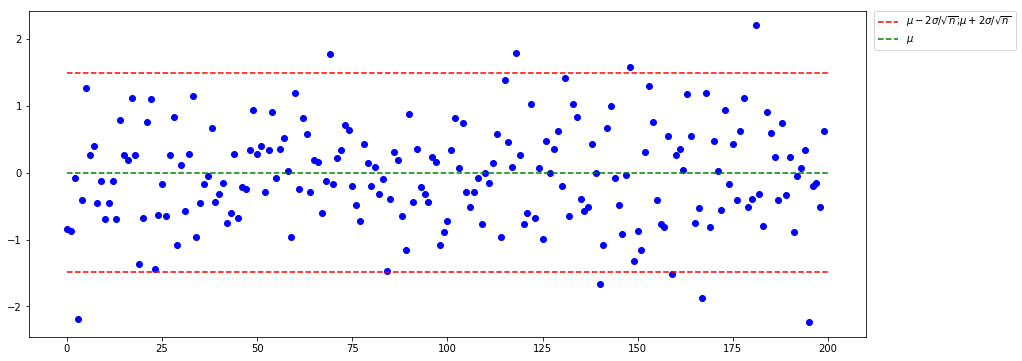

In [9]:
%matplotlib inline
fig, ax1 = plt.subplots(1,figsize=(15, 6))


# Création de la liste des gainsmoyens pour N échantillons de taille n
def echantillonGains(mise, N, n):
    echantillon = []
    for i in range(N):
        echantillon.append(gainMoyen(mise, n))
    return echantillon
# Borne de l'intervalle 
def bornes(E, sigma, n):
    return E-2*sigma/math.sqrt(n),E+2*sigma/math.sqrt(n)
#Calcul de la proportion des cas où l’écart entre le gain moyen et l'espérance est inférieur ou égal à 2𝜎/√𝑛
def propPoint(echantillon, i, s):
    filtre = [x for x in echantillon if x <= s and x >= i]
    return len(filtre)/len(echantillon)

#Constantes
mise = 8.4
N = 200
n = 100
X = [mise, 6, -mise]
P = [1/8, 7/16, 7/16]

#Espérance et écart-type
E = esperance(X, P)
sigma = ecartType(X, P)

#Bornes de l'intervalle
i, s = bornes(E, sigma, n)

#Echantillon
echantillon = echantillonGains(mise, N, n)
print("La proportion des cas où l’écart entre le gain moyen et l'espérance du gain est inférieur ou égal à 2𝜎/√𝑛 est de",propPoint(echantillon,i,s))

#Graphique
ax1.plot(echantillon,'bo')
ax1.plot([0,N],[i,i],'r--',label='$\mu-2\sigma/\sqrt {n}$;$\mu+2\sigma/\sqrt {n}$')
ax1.plot([0,N],[E,E],'g--',label='$\mu$')
ax1.plot([0,N],[s,s],'r--')
ax1.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.show()

In [10]:
%matplotlib inline
import matplotlib.animation
from IPython.display import HTML

#Constantes
mise = 8.4
N = 100
n = 100
X = [mise, 6, -mise]
P = [1/8, 7/16, 7/16]

#Espérance et écart-type
E = esperance(X, P)
sigma = ecartType(X, P)

#Bornes de l'intervalle
i, s = bornes(E, sigma, n)

#Echantillon
echantillon = echantillonGains(mise, N, n)

#paramètres figure
fig, ax1 = plt.subplots(1, 1,figsize=(20, 6))

ax1.plot([0,N],[i,i],'r--',label='$\mu-2\sigma/\sqrt {n}$;$\mu+2\sigma/\sqrt {n}$')
ax1.plot([0,N],[E,E],'g--',label='$\mu$')
ax1.plot([0,N],[s,s],'r--')

points, = ax1.plot([],[],'bo')
ax1.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

def init():
    points.set_data([], [])
    return (points,)

def animate(i):
    global echantillon
    points.set_data([range(i+1),echantillon[:i+1]])
    return (points,)
plt.close ()
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=N,init_func=init,blit=True)
# l'un ou l'autre
HTML(ani.to_jshtml())
#HTML(ani.to_html5_video())